<a href="https://colab.research.google.com/github/allansuzuki/BRFakeNews/blob/main/Classifying_Fake_News.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<table>
  <tr>
    <th>Profile links</th>
  </tr>
  <tr>
    <td>
    <a href="https://www.linkedin.com/in/allanysuzuki"><img src="https://img.icons8.com/external-those-icons-flat-those-icons/24/000000/external-LinkedIn-Logo-social-media-those-icons-flat-those-icons.png" width="24rm"></a></td>
    <td>LinkedIn Profile</td>
  </tr>
  
  <tr>
    <td><a href="https://www.github.com/allansuzuki/portfolio">
    <img src="https://img.icons8.com/ios-filled/50/1A1A1A/github.png" width="28rm">
    </a></td>
    <td>Other projects</td>
  </tr>
</table>

<big>**Classifying Fake News**</big>




#Fake news: The problem

<center>
    <img src="https://img.freepik.com/free-photo/angry-blogger-girl-is-looking-tablet-camera-by-holding-phone-blue-background_176474-118233.jpg" width=500rm>
</center>

Fake news are the news with misinformation sent through social media and webpages, normally in digital open space, where anyone can text and send messages there.

Eventhough these are false messages and some what easy to find if it's true or not, believing in a fraud news can be deadly harmful.

One example happened in 2014 Brazil, where a woman was hurted by people until she died. Fabiane Maria de Jesus was 33 years old, house maid, married, mother of two kids, and she was mistaken for a child kidnapperr, whose spoken sketch, which was made two years ago, was circulating on the internet.

That's why we can see how important is classify news as fake or fact. The main purpose for this publication is build a machine learning model based on neural networks to accomplish this task.

# Problem framing

## Understand the problem

Our goal is build a machine learning model to classify news as fact or fake. <br>
In order to understand the problem, we have to:

* State the goal for the product you are developing or refactoring.
* Determine whether the goal is best solved using ML.
* Verify you have the data required to train a model.


<center>

Tasks| Answers | 
-----|-|
**State the goal**:| Classify news as *fake* or *fact*
**Best solved using ML?**| Yes, non-ML models depends on common sense and intuition
**Is data required in quality?** | Yes, they're abundant (see dataset [here](#scrollTo=#)), from different sources and subjects.

</center>

## Framing ML Problem

After verifying that your problem is best solved using ML and that you have access to the data you'll need, you're ready to frame your problem in ML terms. You frame a problem in ML terms by completing the following tasks:

* Define the ideal outcome and the model's goal.
* Identify the model's output.
* Define success metrics.




<center>

Tasks| Answers | 
-----|-|
**Ideal outcome (same as *State the goal*)**:| Classify news as *fake* or *fact*
**Model's goal:**| Accept trustfull news and reject possible harm or unwanted ones.
**Model's output** | `label`: binary classification (True or False)
**Success metrics** | Optimize MMC (*phi coeff*) and take less time to analyze uncertain news.

</center>

<big>Complete framing problem:</big>

<center>

Tasks| Answers | 
-----|-|
**Understand the problem** |
**State the goal**:| Classify news as *fake* or *fact*
**Best solved using ML?**| Yes, non-ML models depends on common sense and intuition
**Is data required in quality?** | Yes, they're abundant (see dataset [here](#scrollTo=nz4c2vbH1lAw)), from different sources and subjects.
**ML problem** |
**Ideal outcome (same as *State the goal*)**:| Classify news as *fake* or *fact*
**Model's goal:**| Accept trustfull news and reject possible harm or unwanted ones.
**Model's output** | `label`: binary classification (True or False)
**Success metrics** | Optimize MMC (*phi coeff*) better then model before and take less time to analyze uncertain news.

</center>

# General Imports

In [1]:
#@title
#install
!pip install tensorflow-addons

# import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%tensorflow_version 2.x
# import tensorflow as tf
# from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Embedding, Conv1D, GlobalMaxPool1D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow_addons.metrics import MatthewsCorrelationCoefficient

# random seed and graph style
seed = 11
np.random.seed(seed)
sns.set_style()

# filter warning messages
import warnings
warnings.filterwarnings('ignore')

# load dataset
raw = pd.read_csv('https://github.com/allansuzuki/BRFakeNews/blob/main/data/dataset.csv?raw=true')

#rename columns
raw.columns = ['idx','news','category','label','target']

#set df to work on
df = raw[['news','category','target']]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.1 MB 3.3 MB/s 
Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


# Explore data (EDA)

In [ ]:
#@title Dataset
df.sample(5,random_state=11)

,news,category,target
2571,governo petista mg faz licitacao r mil inclui ...,politica,1
6860,caro historia enem bate recorde arrecadacao in...,tv_celebridades,0
5847,galloro reune todas condicoes comandar pf diz ...,politica,0
3383,mae geddel defende filho nao bandido doente fi...,politica,1
820,prefeitura sp confirma carro doria nao estacio...,politica,1


We can see each row is a single news, with its category and target, meaning 1 as **fake news** and 0 as fact.

## Profiling data

In [ ]:
#@title
# Profiling data
print('What are the columns, their types and non-null counts?')
df.info()
print('\nHow is the distribution of data and its stats?')
display(df.describe())
print('\nHow many unique labels we have in each feature?')
display(df.nunique())
print('\nCategory labels:')
display(df['category'].unique())
print('\nHow many news for each category do we have?')
display(df['category'].value_counts().to_frame().assign(perc=lambda x:x['category']*100/x['category'].sum()))
print('\nClassification labels:')
display(df['target'].value_counts())

What are the columns, their types and non-null counts?
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7200 entries, 0 to 7199
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   news      7200 non-null   object
 1   category  7200 non-null   object
 2   target    7200 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 168.9+ KB

How is the distribution of data and its stats?


,target
count,7200.000000
mean,0.500000
std,0.500035
min,0.000000
25%,0.000000
50%,0.500000
75%,1.000000
max,1.000000



How many unique labels we have in each feature?


news        7198
category       6
target         2
dtype: int64


Category labels:


array(['politica', 'tv_celebridades', 'sociedade_cotidiano',
       'ciencia_tecnologia', 'economia', 'religiao'], dtype=object)


How many news for each category do we have?


,category,perc
politica,4180,58.055556
tv_celebridades,1544,21.444444
sociedade_cotidiano,1276,17.722222
ciencia_tecnologia,112,1.555556
economia,44,0.611111
religiao,44,0.611111



Classification labels:


1    3600
0    3600
Name: target, dtype: int64

Observing the data, we have 7200 news, all classified and labeled with some data.

The `target` has only 0 and 1 and balanced (extremely important to train the model)

Each news is ont unique (expected 7200), we will look at this later.

The six categories are politica, tv_celebridades, sociedade_cotidiano, ciencia_tecnologia, economia, religiao (english: politics, tv_celebrities, society, science_n_technology, economy and religion).

Each of them has its own distribution, i.e, there are more `politica` news than `religião` news, which make the model to learn better politics than others.

There are 7200 rows in the data, but only 7198 news are unique, so there are duplicated values in the data. <br>Let's look for them:

In [ ]:
#@title
# display(df[df.duplicated(keep=False)])
# print('')
display(df[df['news'].duplicated(keep=False)])

,news,category,target
4446,alckmin busca resgatar discurso tucano ano ele...,politica,0
6488,alckmin busca resgatar discurso tucano ano ele...,politica,0
6769,suplicy participara programa doria web nesta q...,tv_celebridades,0
6857,suplicy participara programa doria web nesta q...,politica,0


We have a duplicated row and mix category, because the same news is classified as `politica` and `tv_celebridades`. Since the model is not multi-classification type, we will keep the last duplicated news, which maintains the lower class `tv_celebridades`.

## Cleaning Data

In [2]:
#remove duplicated rows, keeping the last
df_clean = df[~df['news'].duplicated(keep='last')].reset_index(drop=True)

# Model selection

## Train test split

In order to train the model and validate, we have to split the data into training, validation and test (or hold-out).

The training set makes the model learns the trainable params.

The validation set is used to tune the model if it's not performing well.

The test set is used to test all the tuned model.

In [3]:
#@title
#train test validation split
train,test = train_test_split(df_clean,test_size=.2,random_state=seed)
train, validation = train_test_split(train, test_size=.2, random_state=seed)
print(f"""train size: {len(train)}\t max_words_news:{max([len(x.split(' ')) for x in train.news.values])}
validation size: {len(validation)}\t max_words_news:{max([len(x.split(' ')) for x in validation.news.values])}
test size: {len(test)}\t\t max_words_news:{max([len(x.split(' ')) for x in test.news.values])}""")

train size: 4606	 max_words_news:4229
validation size: 1152	 max_words_news:3410
test size: 1440		 max_words_news:3865


## Preprocessing

Preprocessing consists of apply some arguments to define how our model will preprocess the data.

For example, `trunc_type` is the `truncating` argument for pad_sequences to truncate texts. For further information, see the [tensorflow documentation](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/text) and [tensorflow text analysis tutorial](https://www.tensorflow.org/tutorials/keras/text_classification).

The text has already been text-preprocessed (replace slang, remove non-context words, remove punctuation, apply lower case,...)

In [4]:
# pre-set
vocab_size = 10000
trunc_type = "post"  #truncating arg for pad_sequences
pad_type = "post"  #padding arg for pad_sequences
oov_tok = "<OOV>"  #Out of vocabulary token

#tokenizer: each sequence will be encoded based on 'texts' vocabulary
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(train.news)
word_index = tokenizer.word_index

#encode news with tokenizer and apply post padding and trucating
train_sequences = tokenizer.texts_to_sequences(train.news.values)
train_padded = pad_sequences(train_sequences, padding=pad_type, truncating=trunc_type)
#set max length
max_len = len(train_padded[0])

#encode validation set and apply padding
validation_sequences = tokenizer.texts_to_sequences(validation.news.values)
validation_padded = pad_sequences(validation_sequences, padding=pad_type, truncating=trunc_type, maxlen=max_len)

#create feature set X and label vector y
X_train, y_train = np.copy(train_padded), train['target'].values
X_val, y_val = np.copy(validation_padded), validation['target'].values

In [16]:
#see train and val size
print(f"""train size:\t\tX: {len(X_train)}\t y:{len(y_train)} \t max_word_news:{max([len(x) for x in train_padded])}
validation size:\tX: {len(X_val)}\t y:{len(y_val)} \t max_word_news:{max([len(x) for x in validation_padded])}""")

train size:		X: 4606	 y:4606 	 max_word_news:4229
validation size:	X: 1152	 y:1152 	 max_word_news:4229


#Create model

In order to create the model, we build a sequencial neural network:
* embedding layer [(+info)](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Embedding): gives the similar values to similar words.
* Convolution1D [(+info)](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv1D): apply a learnable kernel in batchs of the sequence, trying to identify features in it.
* GlobalMaxPool1D [(+info)](https://www.tensorflow.org/api_docs/python/tf/keras/layers/GlobalMaxPool1D): return only the max values for each batch in the sequence (highlight even more the features).
* Dense: dense layer which has trainable params for each feature in a vector, resulting in a single value applyied in a sigmoidal function (expect to return 0 or 1).

In [6]:
#Create NN model
model = Sequential([
    Embedding(vocab_size, 155, input_length=max_len),
    Conv1D(16,5,activation='relu'),
    GlobalMaxPool1D(),
    Dense(1,activation='sigmoid')
])

#applying metrics and objective function
mmc = MatthewsCorrelationCoefficient(num_classes=2)
model.compile(loss='binary_crossentropy',optimizer=Adam(learning_rate=.001),metrics=['acc','Recall','Precision','FalseNegatives'])

#fit model
history = model.fit(X_train,y_train,verbose=2, epochs=4, validation_data=(X_val,y_val),
                    callbacks=EarlyStopping('val_loss', patience=3))

Epoch 1/4
144/144 - 136s - loss: 0.4688 - acc: 0.8241 - recall: 0.7018 - precision: 0.9255 - false_negatives: 681.0000 - val_loss: 0.2690 - val_acc: 0.9019 - val_recall: 0.8694 - val_precision: 0.9319 - val_false_negatives: 76.0000 - 136s/epoch - 946ms/step
Epoch 2/4
144/144 - 132s - loss: 0.1688 - acc: 0.9436 - recall: 0.9387 - precision: 0.9470 - false_negatives: 140.0000 - val_loss: 0.1784 - val_acc: 0.9375 - val_recall: 0.9433 - val_precision: 0.9337 - val_false_negatives: 33.0000 - 132s/epoch - 920ms/step
Epoch 3/4
144/144 - 129s - loss: 0.0803 - acc: 0.9800 - recall: 0.9768 - precision: 0.9828 - false_negatives: 53.0000 - val_loss: 0.1567 - val_acc: 0.9418 - val_recall: 0.9347 - val_precision: 0.9494 - val_false_negatives: 38.0000 - 129s/epoch - 893ms/step
Epoch 4/4
144/144 - 121s - loss: 0.0317 - acc: 0.9970 - recall: 0.9961 - precision: 0.9978 - false_negatives: 9.0000 - val_loss: 0.1485 - val_acc: 0.9453 - val_recall: 0.9433 - val_precision: 0.9482 - val_false_negatives: 33.00

In [23]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 4229, 155)         1550000   
                                                                 
 conv1d (Conv1D)             (None, 4225, 16)          12416     
                                                                 
 global_max_pooling1d (Globa  (None, 16)               0         
 lMaxPooling1D)                                                  
                                                                 
 dense (Dense)               (None, 1)                 17        
                                                                 
Total params: 1,562,433
Trainable params: 1,562,433
Non-trainable params: 0
_________________________________________________________________
None


We can see form the log of the model that the `loss` lowered from traning and validations sets, which is a good way to see the performance of the model. Another metric is the reduce of `false negatives (FN)` predictions, which is also a good metric to see if the model is performing good. Eventhough this is an example of classification task, the dataset is not imbalanced, which also makes the `accuracy` a good metric in this case.

# Model validation

In [7]:
def plot_graphs(history, str_metric):
    plt.plot(history.history[str_metric])
    plt.plot(history.history['val_'+str_metric])
    plt.xlabel('Epochs')
    plt.xticks(ticks=history.epoch)
    plt.ylabel(str_metric)
    plt.legend([str_metric,'val_'+str_metric])
    plt.show()

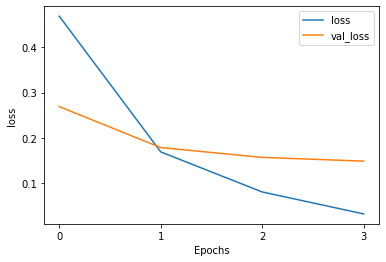

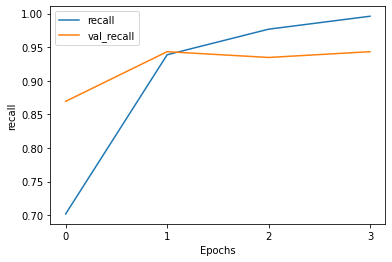

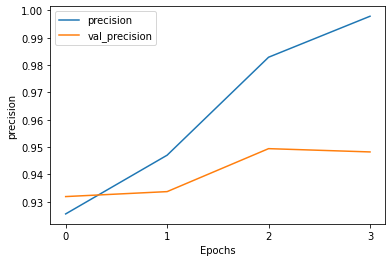

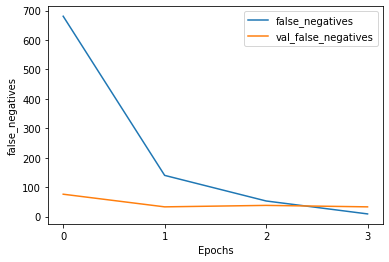

In [8]:
plot_graphs(history,'loss')
plot_graphs(history,'recall')
plot_graphs(history,'precision')
plot_graphs(history,'false_negatives')

In [9]:
#@title In sample
y_pred_train = np.round(model.predict(X_train))
y_pred_val = np.round(model.predict(X_val))

36/36 [==============================] - 4s 124ms/step


Training set


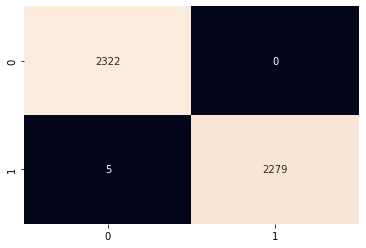

Validation set


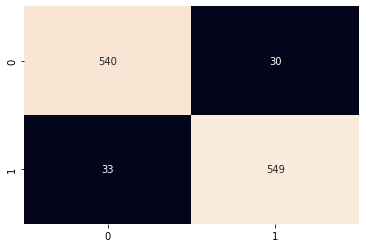

In [10]:
#@title
#confusion matrix training set
print('Training set')
sns.heatmap(confusion_matrix(y_train,y_pred_train),fmt='.0f',cbar=False,annot=True);
plt.show()
print('Validation set')
sns.heatmap(confusion_matrix(y_val,y_pred_val),fmt='.0f',cbar=False,annot=True);
plt.show()

45/45 [==============================] - 6s 126ms/step
Test set


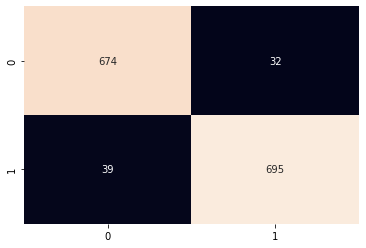

In [11]:
#@title hold-out
#preprocess test data
test_seq = tokenizer.texts_to_sequences(test.news.values)
test_padded = pad_sequences(test_seq, maxlen=max_len, padding=pad_type, truncating=trunc_type)

y_pred = np.round(model.predict(test_padded))

print('Test set')
sns.heatmap(confusion_matrix(test['target'],y_pred),fmt='.0f',cbar=False,annot=True);
plt.show()

But how many news of each category my model misclassified?

In [12]:
#@title
# print('categories in train')
# display(train.category.value_counts())
# print('\ncategories in validation')
# display(validation.category.value_counts())
# print('\ncategories in test')
# display(test.category.value_counts())
df_w_pred = test.assign(pred=y_pred)
df_w_pred['ok'] = df_w_pred['target']==df_w_pred['pred']
df_compare_results_by_category = df_w_pred.query('ok==False')

print('How many news of each category my model mispredicted in Test set?')
count_values = df_w_pred.category.value_counts()
tab_compare = df_compare_results_by_category.category.value_counts().to_frame().assign(perc=lambda x: 100*x['category']/count_values)
display(tab_compare)

How many news of each category my model mispredicted in Test set?


,category,perc
politica,39,4.620853
tv_celebridades,18,5.696203
sociedade_cotidiano,11,4.453441
ciencia_tecnologia,2,11.764706
religiao,1,11.111111


# Deploy model

In [ ]:
#save the model to use in tests and deploy
classifier_fakenews = model.save('clFakeNews.tf')  #saves in local as tensorflow model

#you can also save the model weights (the trainable params)
# classifier_fakenews_weights = model.save_weights('clFakeNews_weights.tf')

#load the model
# from tensorflow.keras.models import load_model
# cl_fakenews = load_model('clFakeNews.tf')

# Conclusion



We successfully build a fakenews classifier based on brazilian news. 

The model was built preprocessing texts and applying that to a neural network model with embedding, convolutional and maxpool layers. The evaluation of the model was made using metrics, which they showed good performance of the model while training.

The accuracy of the model was in test set 95.5%, with 4% of False Negatives (real fake news not detected by the model). 